In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df=pd.read_csv("CA purchase.csv")
df.head()

,Creation Date,Fiscal Year,Acquisition Method,Item Description,Location,Acquisition Method Description,Acquisition Type,Department Name,Department Name.1,Total Price,Quantity,Purchase Order Number,Supplier Name,CalCard
0,2014-01-29,2013-2014,Informal Competitive,Tire Disposal,Not Spacified,Informal solicitations are generally straightf...,NON-IT Goods,"Consumer Affairs, Department of","Consumer Affairs, Department of",$2.00$2.00,2,REQ0011932,Rodea Auto Tech,NO
1,2013-11-01,2013-2014,Informal Competitive,Labor,"95841\n(38.662263, -121.346136)",Informal solicitations are generally straightf...,IT Services,"Consumer Affairs, Department of","Consumer Affairs, Department of",$150.00$150.00$150.00$150.00,4,REQ0011476,"Smile Business Products, Inc",NO
2,2014-06-13,2013-2014,Informal Competitive,NaN,"91436\n(34.151642, -118.49051)",Informal solicitations are generally straightf...,NON-IT Goods,Correctional Health Care Services,Correctional Health Care Services,NaN,0,4500236642,ASHAN INC,NO
3,2014-03-12,2013-2014,Statewide Contract,Toner,"95814\n(38.580427, -121.494396)",Statewide Contracts (SCs) are competitively bi...,NON-IT Goods,"Corrections and Rehabilitation, Department of","Corrections and Rehabilitation, Department of",$6080.26,1,4500221028,Technology Integration Group,NO
4,2014-10-09,2014-2015,Informal Competitive,NaN,"97008\n(45.460518, -122.806409)",Informal solicitations are generally straightf...,NON-IT Goods,Correctional Health Care Services,Correctional Health Care Services,NaN,0,4500253427,WALGREENS SPECIALTY PHARMACY LLC,NO


In [ ]:
df=df.drop('Purchase Date',axis=1)

In [4]:
df['Creation Date']=pd.to_datetime(df['Creation Date'])
df['Creation year']=df['Creation Date'].dt.year
df['Creation Month']=df['Creation Date'].dt.month
df['Creation Day']=df['Creation Date'].dt.day
df['Creation quarter']=df['Creation Date'].dt.quarter


In [5]:
df.head(3)

,Creation Date,Fiscal Year,Acquisition Method,Item Description,Location,Acquisition Method Description,Acquisition Type,Department Name,Department Name.1,Total Price,Quantity,Purchase Order Number,Supplier Name,CalCard,Creation year,Creation Month,Creation Day,Creation quarter
0,2014-01-29,2013-2014,Informal Competitive,Tire Disposal,Not Spacified,Informal solicitations are generally straightf...,NON-IT Goods,"Consumer Affairs, Department of","Consumer Affairs, Department of",$2.00$2.00,2,REQ0011932,Rodea Auto Tech,NO,2014,1,29,1
1,2013-11-01,2013-2014,Informal Competitive,Labor,"95841\n(38.662263, -121.346136)",Informal solicitations are generally straightf...,IT Services,"Consumer Affairs, Department of","Consumer Affairs, Department of",$150.00$150.00$150.00$150.00,4,REQ0011476,"Smile Business Products, Inc",NO,2013,11,1,4
2,2014-06-13,2013-2014,Informal Competitive,NaN,"91436\n(34.151642, -118.49051)",Informal solicitations are generally straightf...,NON-IT Goods,Correctional Health Care Services,Correctional Health Care Services,NaN,0,4500236642,ASHAN INC,NO,2014,6,13,2


In [6]:
df['Creation year'].value_counts()

Creation year
2014    119148
2013    114198
2015     62266
2012     47087
Name: count, dtype: int64

In [7]:
df.groupby(["Fiscal Year"])[["Purchase Order Number"]].count().reset_index().sort_values(by=['Fiscal Year'],ascending=True)

,Fiscal Year,Purchase Order Number
0,2012-2013,108025
1,2013-2014,119503
2,2014-2015,115171


In [ ]:
result=df.groupby(["Fiscal Year"])[["Total Price"]].sum().reset_index().sort_values(by=['Fiscal Year'],ascending=True)
result["Total Price"] = result["Total Price"].map('{:,.2f}'.format)
result

## Total Price per year ,Quarter,Month ,Day

In [ ]:
#Total Price per year
result=df.groupby(["Creation year"])[["Total Price",'Quantity']].sum().reset_index().sort_values(by=['Creation year'],ascending=False)
result["Total Price"] = result["Total Price"].map('{:,.2f}'.format)
result

In [ ]:
#Total Price per Month
result=df.groupby(["Creation year","Creation Month"])[['Quantity',"Total Price"]].sum().reset_index().sort_values(by=['Creation year',"Creation Month"],ascending=False)
result["Total Price"] = result["Total Price"].map('{:,.2f}'.format)
result

,Creation year,Creation Month,Quantity,Total Price
35,2015,6,69860365,"8,758,922,349.08"
34,2015,5,15541716,"8,959,345,851.53"
33,2015,4,13521586,"11,082,454,212.85"
32,2015,3,32310129,"1,233,527,178.52"
31,2015,2,12519372,"3,539,796,162.32"
30,2015,1,7077383,"3,515,065,014.01"
29,2014,12,18377792,"837,855,371.66"
28,2014,11,26482995,"1,741,111,922.43"
27,2014,10,11909853,"1,248,880,983.76"
26,2014,9,7906881,"1,510,162,499.05"


In [ ]:
#Total Price per Day
result=df.groupby(["Creation year","Creation Month","Creation Day"])[['Quantity',"Total Price"]].sum().reset_index().sort_values(by=['Creation year',"Creation Month"],ascending=False)
result["Total Price"] = result["Total Price"].map('{:,.2f}'.format)
result

,Creation year,Creation Month,Creation Day,Quantity,Total Price
985,2015,6,1,118443,"51,894,965.51"
986,2015,6,2,45171,"91,754,891.79"
987,2015,6,3,774991,"57,204,188.91"
988,2015,6,4,605061,"38,305,446.39"
989,2015,6,5,293671,"97,743,784.99"
...,...,...,...,...,...
23,2012,7,27,134290,"7,309,370.01"
24,2012,7,28,363,"56,241.10"
25,2012,7,29,23,"68,296.34"
26,2012,7,30,1554950,"12,806,739.94"


In [ ]:
#Total Price per Day
result=df.groupby(["Creation year","Creation Month","Creation Day"])[['Quantity',"Total Price"]].sum().reset_index().sort_values(by=['Creation year',"Creation Month"],ascending=False)
result["Total Price"] = result["Total Price"].map('{:,.2f}'.format)
result

,Creation year,Creation Month,Creation Day,Quantity,Total Price
985,2015,6,1,118443,"51,894,965.51"
986,2015,6,2,45171,"91,754,891.79"
987,2015,6,3,774991,"57,204,188.91"
988,2015,6,4,605061,"38,305,446.39"
989,2015,6,5,293671,"97,743,784.99"
...,...,...,...,...,...
23,2012,7,27,134290,"7,309,370.01"
24,2012,7,28,363,"56,241.10"
25,2012,7,29,23,"68,296.34"
26,2012,7,30,1554950,"12,806,739.94"


---

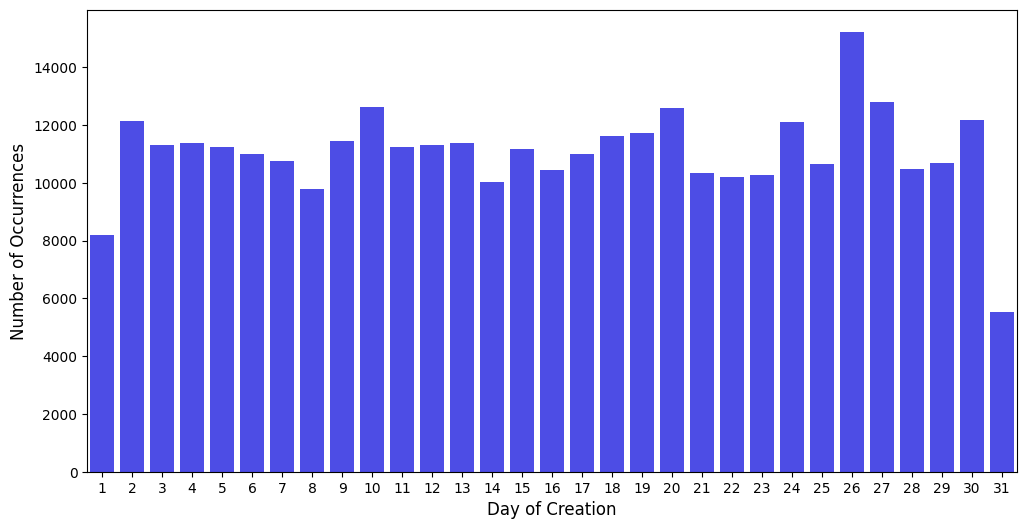

In [ ]:
cnt_data = df['Creation Day'].value_counts()
plt.figure(figsize=(12,6))


sns.barplot(x=cnt_data.index, y=cnt_data.values, alpha=0.8, color='blue')
plt.xlabel('Day of Creation', fontsize=12)
plt.ylabel('Number of appearance', fontsize=12)
plt.show()

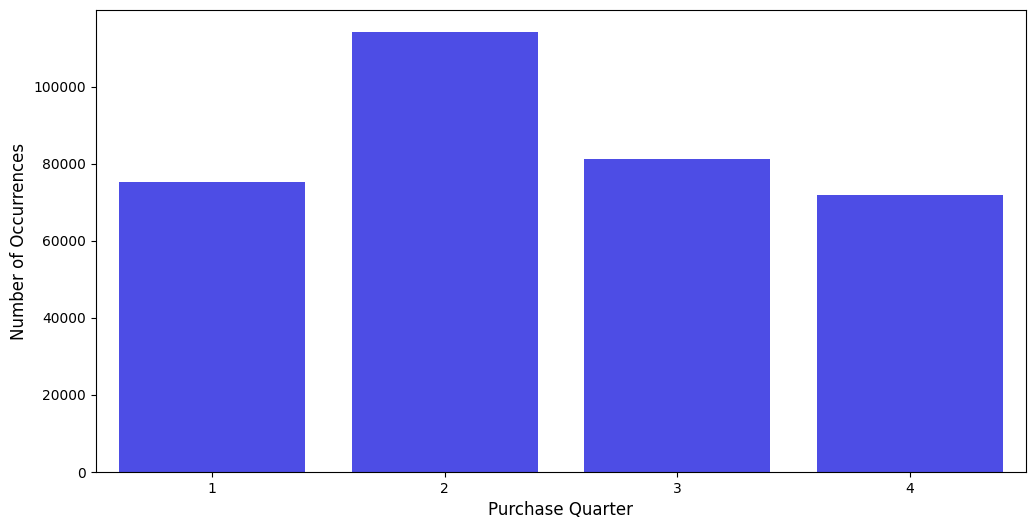

In [ ]:
cnt_data = df['Creation quarter'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_data.index, y=cnt_data.values, alpha=0.8, color='blue')
plt.xlabel('Purchase Quarter', fontsize=12)
plt.ylabel('Number of appearance', fontsize=12)
plt.show()

second quarter appers the most in the data,Most of the Purchases are made in second quarter of the year.

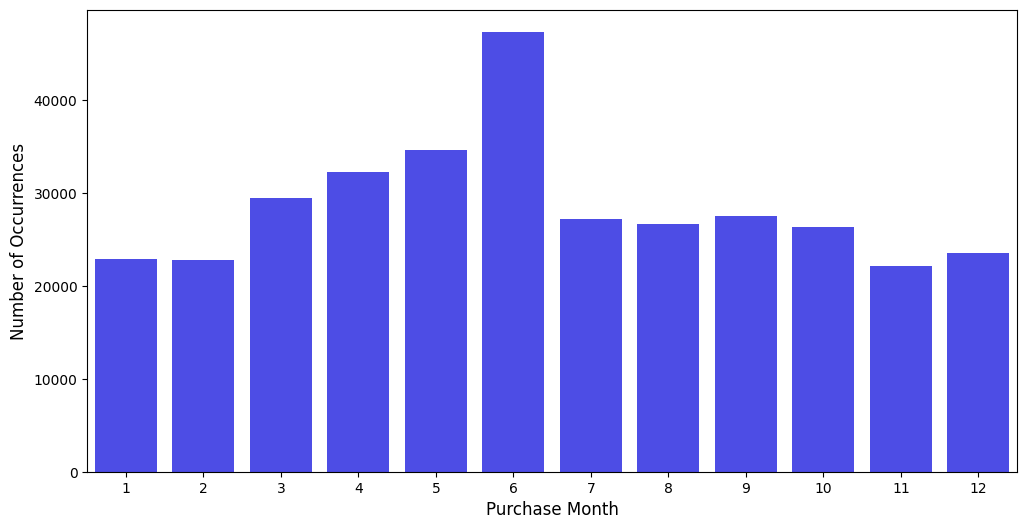

In [ ]:
cnt_data = df['Creation Month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_data.index, y=cnt_data.values, alpha=0.8, color='blue')
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Number of appearance', fontsize=12)
plt.show()

Most of the Purchases are made in June.

### Total number of orders 

In [19]:
# Total number of orders by Day
result=df.groupby(["Creation year","Creation Month","Creation Day"])[["Purchase Order Number"]].count().reset_index().sort_values(by=['Creation year',"Creation Month"],ascending=[False,False])
result

,Creation year,Creation Month,Creation Day,Purchase Order Number
985,2015,6,1,928
986,2015,6,2,521
987,2015,6,3,825
988,2015,6,4,674
989,2015,6,5,539
...,...,...,...,...
23,2012,7,27,385
24,2012,7,28,4
25,2012,7,29,4
26,2012,7,30,352


In [17]:
# Total number of orders by Month
result=df.groupby(["Creation year","Creation Month"])[["Purchase Order Number"]].count().reset_index().sort_values(by=['Creation year',"Creation Month"],ascending=[False,False])
result

,Creation year,Creation Month,Purchase Order Number
35,2015,6,15422
34,2015,5,10986
33,2015,4,11440
32,2015,3,9828
31,2015,2,7071
30,2015,1,7519
29,2014,12,7604
28,2014,11,7023
27,2014,10,9508
26,2014,9,10164


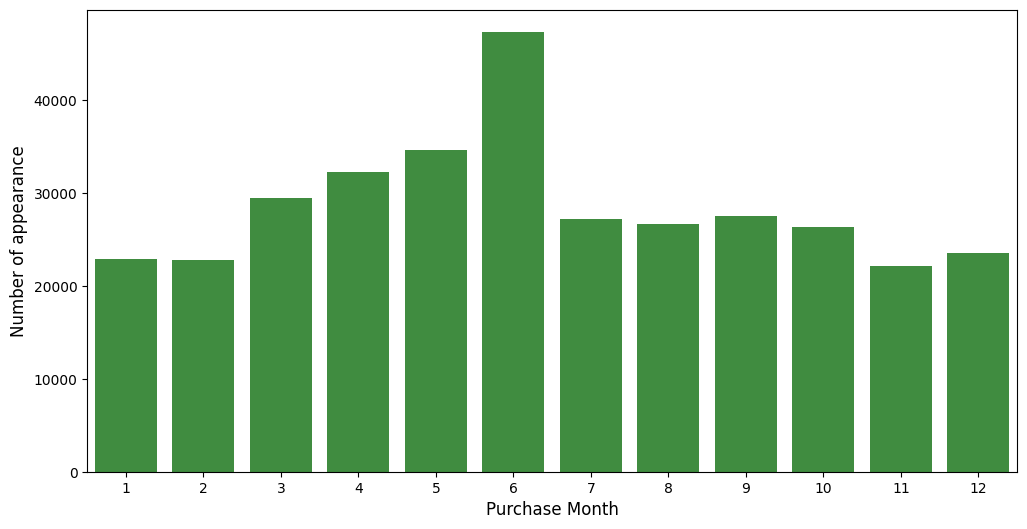

In [16]:
cnt_data=df.groupby(["Creation Month"])[["Purchase Order Number"]].count().reset_index().sort_values(by=['Creation Month'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_data['Creation Month'], y=cnt_data['Purchase Order Number'], alpha=0.8, color='green')
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Number of appearance', fontsize=12)
plt.show()

In [8]:
# Total number of orders by year
result=df.groupby(["Creation year"])[["Purchase Order Number"]].count().reset_index().sort_values(by=['Creation year'],ascending=False)
result

,Creation year,Purchase Order Number
3,2015,62266
2,2014,119148
1,2013,114198
0,2012,47087


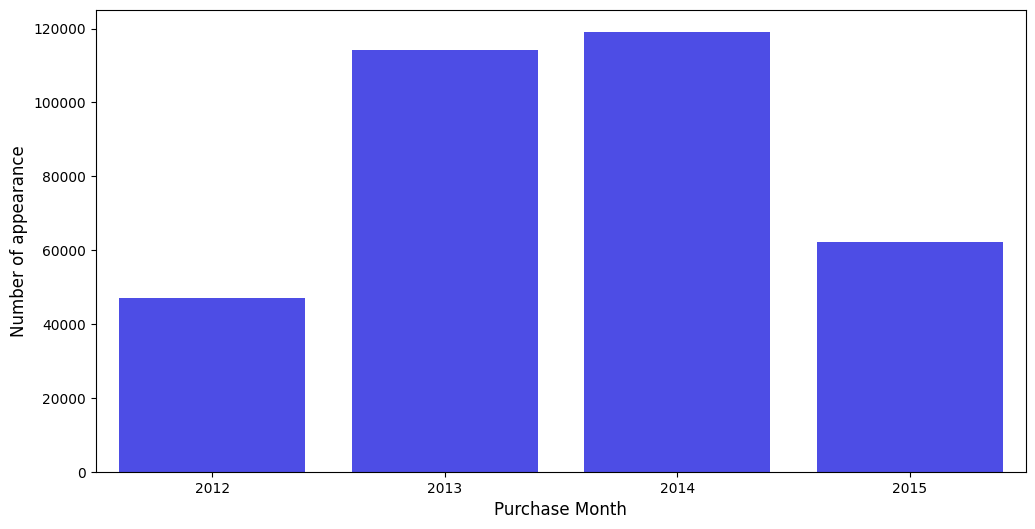

In [10]:
cnt_data=df.groupby(["Creation year"])[["Purchase Order Number"]].count().reset_index().sort_values(by=['Creation year'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=cnt_data['Creation year'], y=cnt_data['Purchase Order Number'], alpha=0.8, color='blue')
plt.xlabel('Purchase Month', fontsize=12)
plt.ylabel('Number of appearance', fontsize=12)
plt.show()

### Frequently ordered items

In [16]:
result=df.groupby(["Creation year","Item Description"])[["Quantity"]].count().reset_index().sort_values(by=["Creation year","Quantity"],ascending=[False, False])
result

,Creation year,Item Description,Quantity
217423,2015,Medical Vocational Training Services,467
233838,2015,confidential,273
237621,2015,vest,266
217412,2015,Medical Supplies,197
227840,2015,TAA,122
...,...,...,...
35720,2012,"yellow, blue and pink 8.5 x 14",1
35721,2012,yupo cover,1
35722,2012,z/os mainframe training curriculum,1
35723,2012,zesty herb,1


Medical Vocational Training Services	 is the most ordered item in year 2015

### Credit Card or Not

In [20]:
df['CalCard'].value_counts()

CalCard
NO     337386
YES      5313
Name: count, dtype: int64

the majority  prefere not using State credit card paying for purchase